# Model Performance Evaluation

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

In [ ]:
# List all metric files to check if they exist
all_files = glob.glob('metrics_*.csv')
print("Files found:")
for f in all_files:
    print(f)

Files found:
metrics_CNN-LSTM-Baseline_META.csv
metrics_CNN-LSTM-Baseline_MSFT.csv
metrics_CNN-LSTM-Baseline_NFLX.csv
metrics_CNN-LSTM-Baseline_NVDA.csv
metrics_CNN-LSTM-Improved_META.csv
metrics_CNN-LSTM-Improved_MSFT.csv
metrics_CNN-LSTM-Improved_NFLX.csv
metrics_CNN-LSTM-Improved_NVDA.csv
metrics_Transformer-LSTM_META.csv
metrics_Transformer-LSTM_MSFT.csv
metrics_Transformer-LSTM_NFLX.csv
metrics_Transformer-LSTM_NVDA.csv
metrics_XGBoost-LSTM_META.csv
metrics_XGBoost-LSTM_MSFT.csv
metrics_XGBoost-LSTM_NFLX.csv
metrics_XGBoost-LSTM_NVDA.csv


In [32]:
# Read and check the data
all_metrics = pd.concat([pd.read_csv(f) for f in all_files])
print("\nUnique models in the data:")
print(all_metrics['Model'].unique())

# Check full dataset
print("\nFull dataset shape:", all_metrics.shape)
print("\nNumber of records for each model:")
print(all_metrics['Model'].value_counts())


Unique models in the data:
['CNN-LSTM-Baseline' 'CNN-LSTM-Improved' 'Transformer-LSTM' 'XGBoost-LSTM']

Full dataset shape: (16, 6)

Number of records for each model:
Model
CNN-LSTM-Baseline    4
CNN-LSTM-Improved    4
Transformer-LSTM     4
XGBoost-LSTM         4
Name: count, dtype: int64


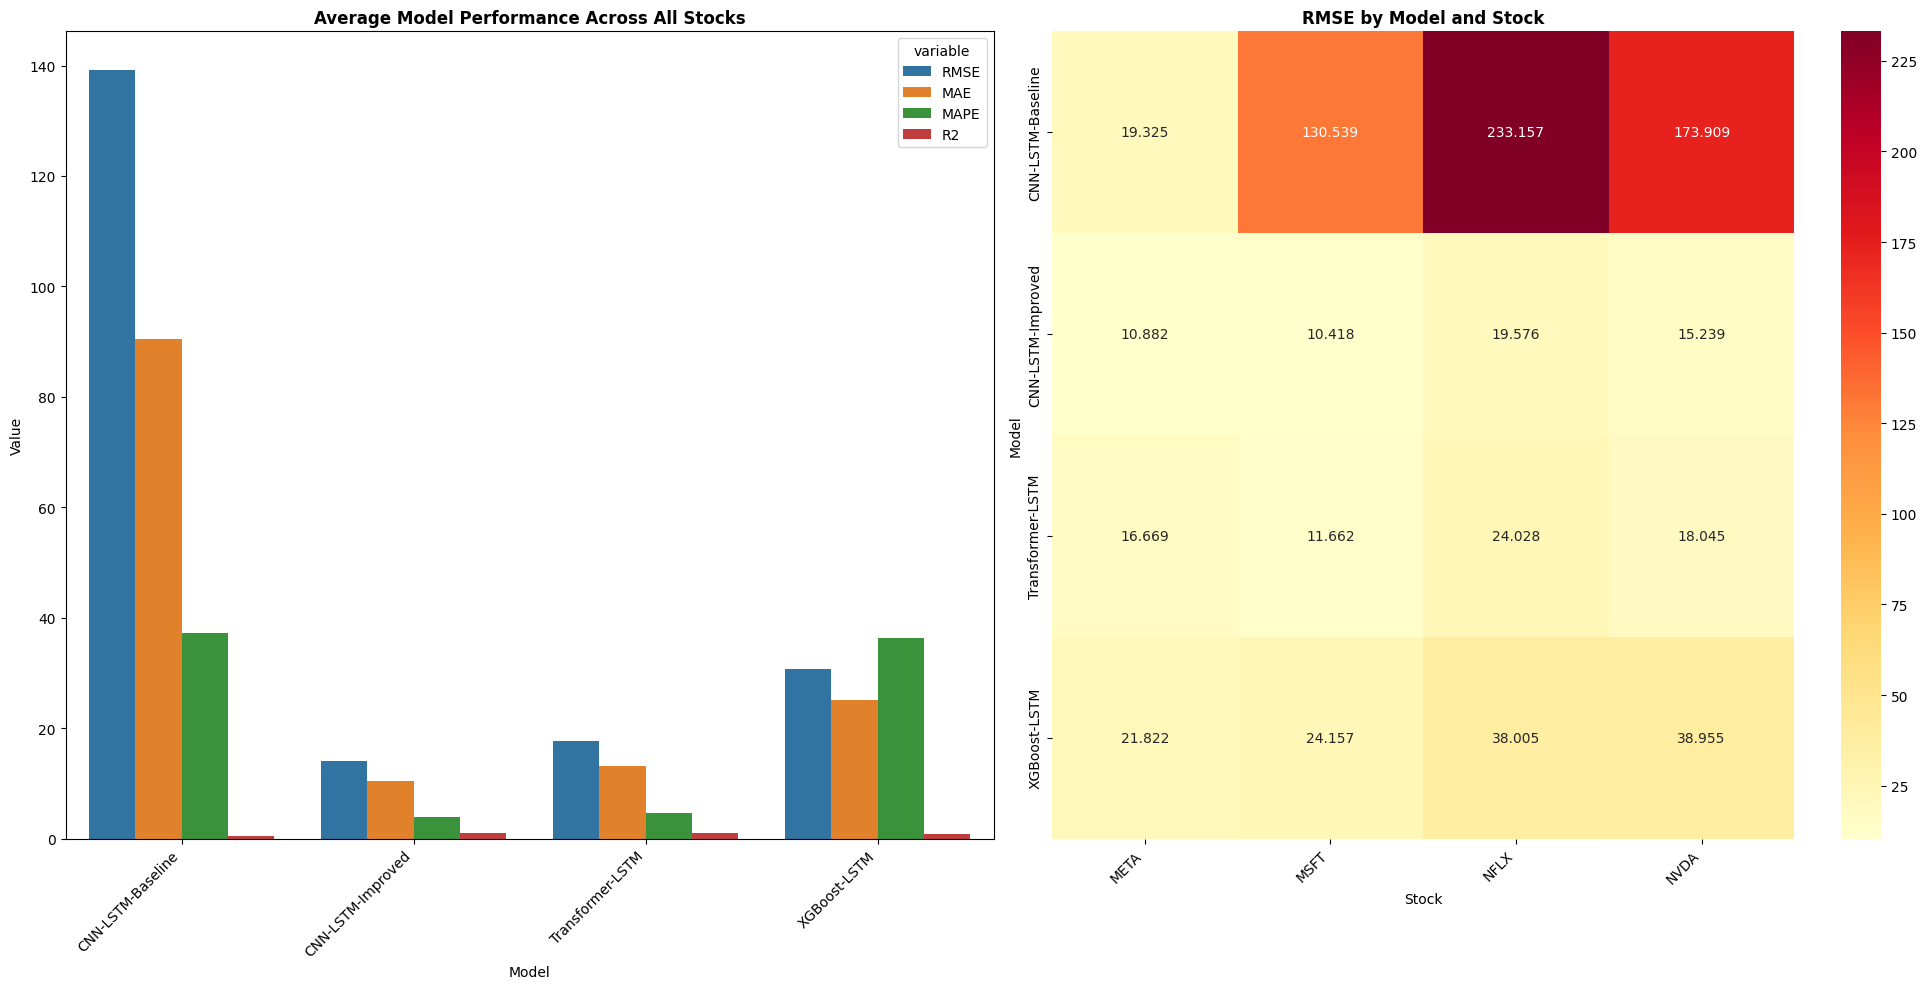


Model Performance Summary:

Average Performance Across All Stocks:
                      RMSE     MAE    MAPE     R2
Model                                            
CNN-LSTM-Baseline  139.232  90.393  37.178  0.480
CNN-LSTM-Improved   14.029  10.479   3.823  0.968
Transformer-LSTM    17.601  13.092   4.615  0.953
XGBoost-LSTM        30.735  25.130  36.277  0.851


In [ ]:
# Read all metrics CSV files
all_files = glob.glob('metrics_*.csv')
all_metrics = pd.concat([pd.read_csv(f) for f in all_files])

def analyze_model_performance(metrics_df):
    # Average Performance Across All Stocks
    avg_performance = metrics_df.groupby('Model')[['RMSE', 'MAE', 'MAPE', 'R2']].mean()
    
    fig = plt.figure(figsize=(20, 10))
    
    # 1. Average Performance Plot
    plt.subplot(1, 2, 1)
    avg_performance_melted = avg_performance.reset_index().melt(id_vars=['Model'])
    
    # Grouped bar plot
    sns.barplot(x='Model', y='value', hue='variable', data=avg_performance_melted)
    plt.title('Average Model Performance Across All Stocks', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Value')
    
    # Per-Stock Performance Heatmap
    plt.subplot(1, 2, 2)
    pivot_rmse = metrics_df.pivot(index='Model', columns='Stock', values='RMSE')
    sns.heatmap(pivot_rmse, annot=True, fmt='.3f', cmap='YlOrRd')
    plt.title('RMSE by Model and Stock', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Statistics
    print("\nModel Performance Summary:")
    print("\nAverage Performance Across All Stocks:")
    print(avg_performance.round(3))
    
   
# Create analysis
analyze_model_performance(all_metrics)

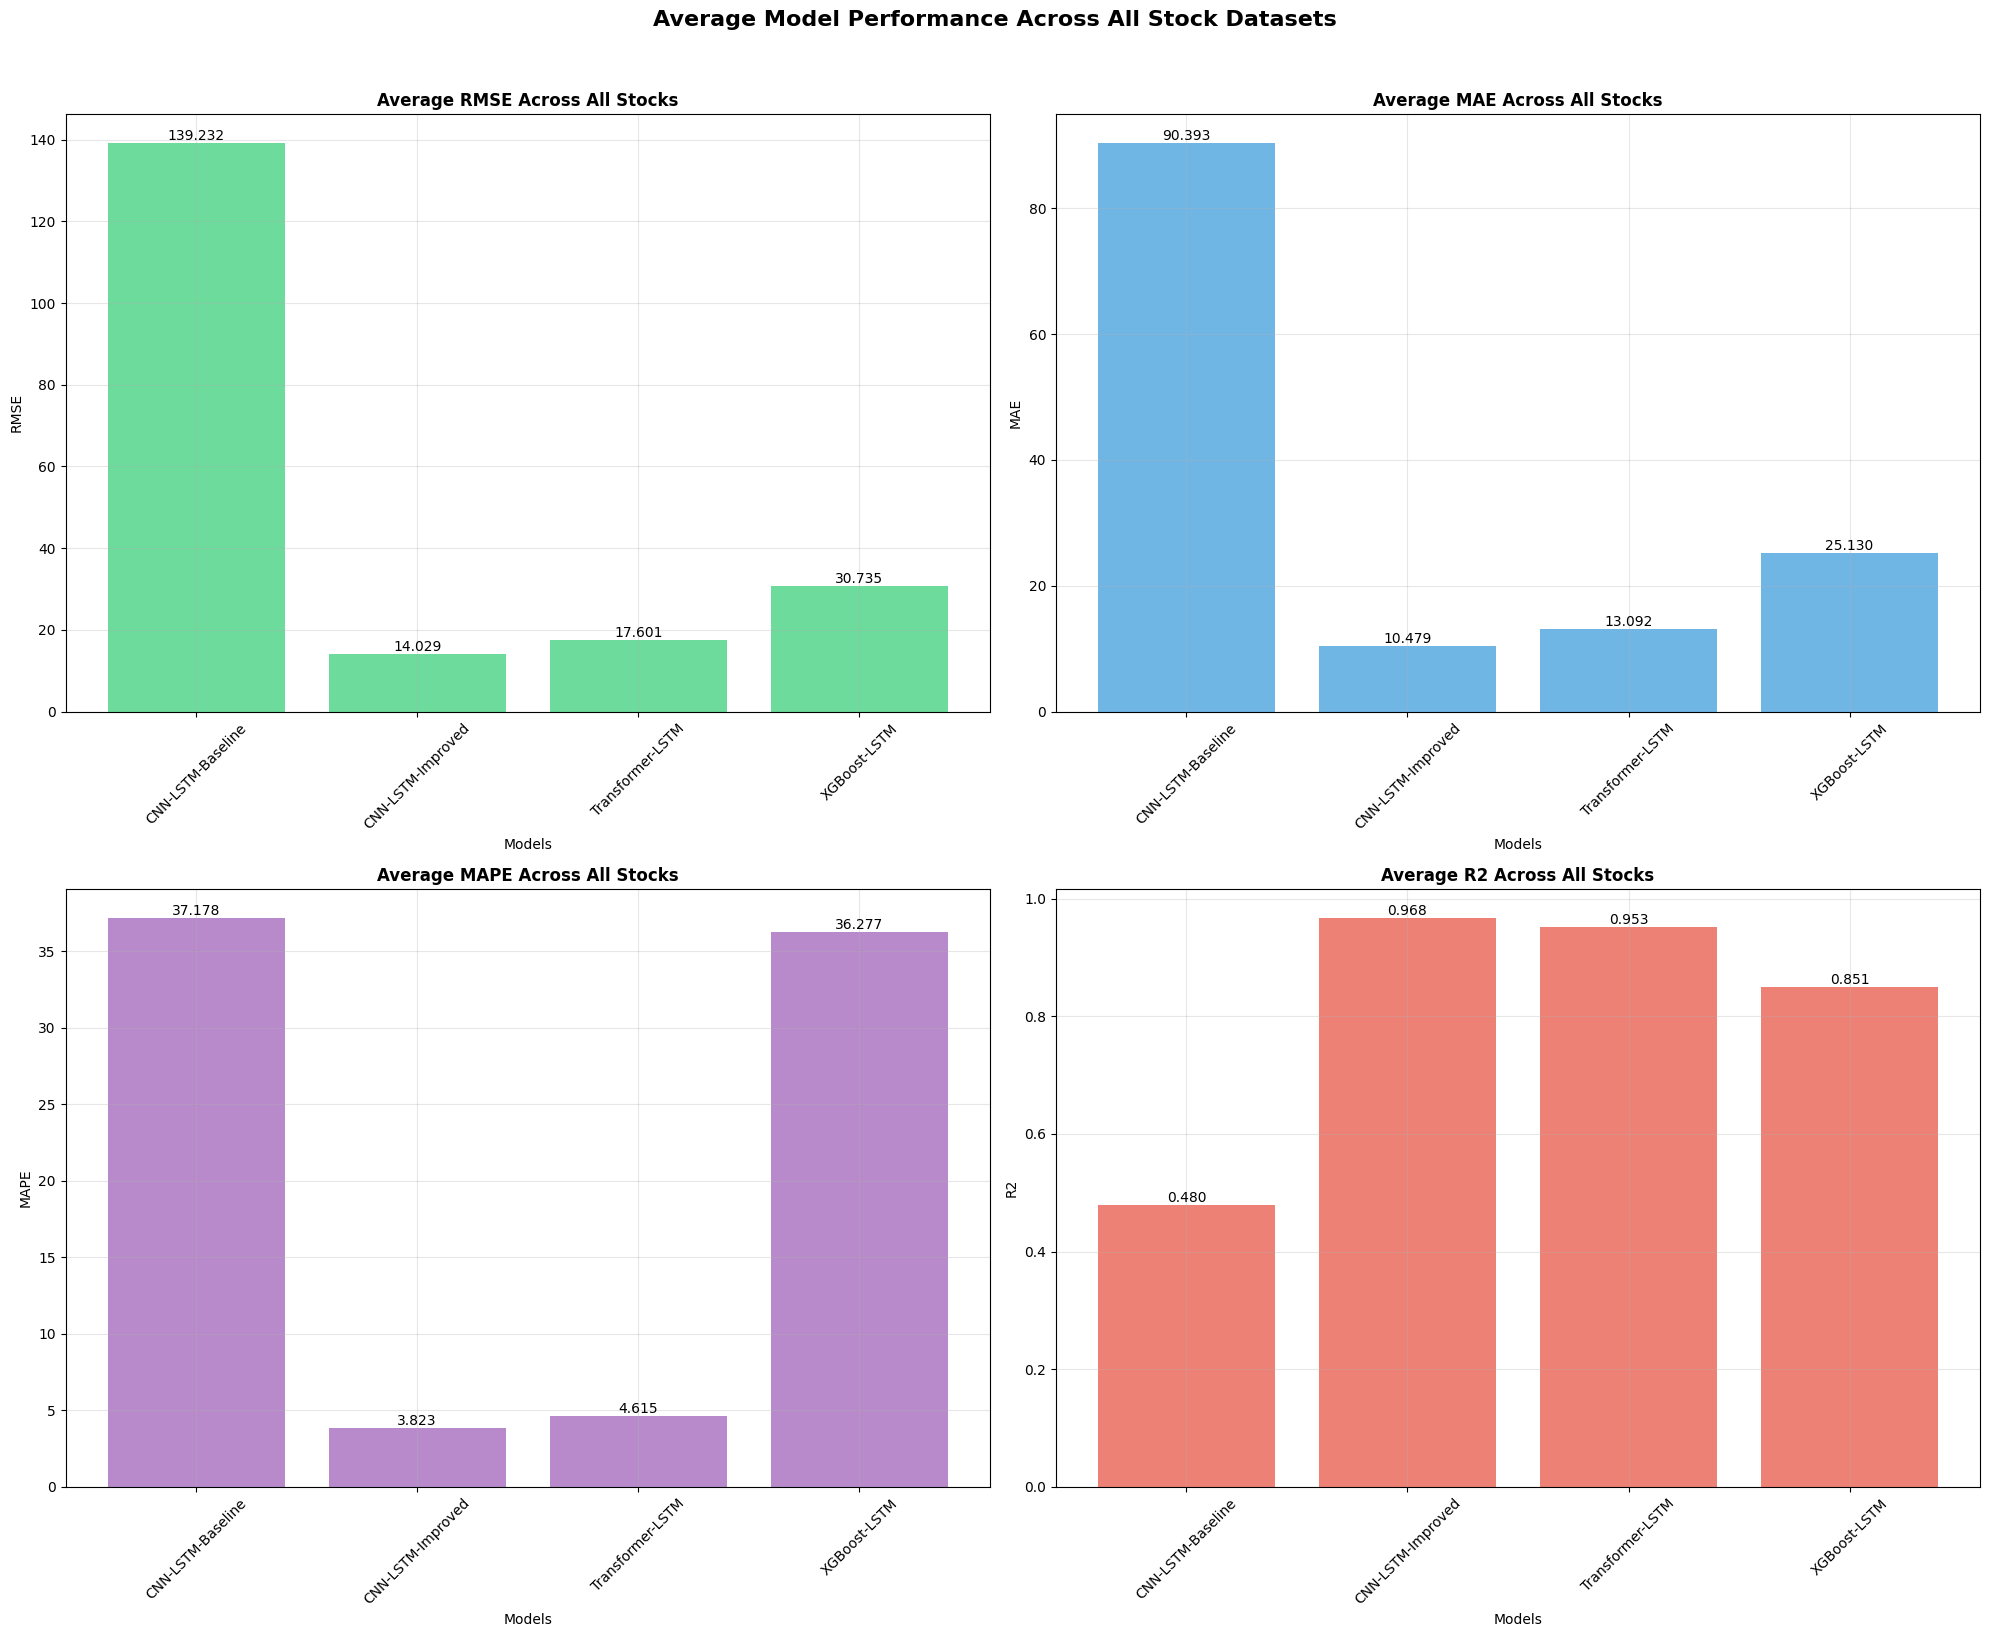


Detailed Performance Summary:

Average Performance Across All Stocks:
                      RMSE     MAE    MAPE     R2
Model                                            
CNN-LSTM-Baseline  139.232  90.393  37.178  0.480
CNN-LSTM-Improved   14.029  10.479   3.823  0.968
Transformer-LSTM    17.601  13.092   4.615  0.953
XGBoost-LSTM        30.735  25.130  36.277  0.851

Best Performing Models:

RMSE:
Best Model: CNN-LSTM-Improved
Average RMSE: 14.029

MAE:
Best Model: CNN-LSTM-Improved
Average MAE: 10.479

MAPE:
Best Model: CNN-LSTM-Improved
Average MAPE: 3.823

R2:
Best Model: CNN-LSTM-Improved
Average R2: 0.968


In [ ]:
# Read all metrics CSV files
all_files = glob.glob('metrics_*.csv')
all_metrics = pd.concat([pd.read_csv(f) for f in all_files])

def visualize_average_performance(metrics_df):
    # Calculate average performance for each model
    avg_performance = metrics_df.groupby('Model')[['RMSE', 'MAE', 'MAPE', 'R2']].mean().round(3)
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.ravel()
    metrics = ['RMSE', 'MAE', 'MAPE', 'R2']
    colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']  # Different color for each metric
    
    for idx, metric in enumerate(metrics):
        # Bar Plot
        ax = axes[idx]
        bars = ax.bar(avg_performance.index, avg_performance[metric], color=colors[idx], alpha=0.7)
        
        # Value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom')
        
        ax.set_title(f'Average {metric} Across All Stocks', fontsize=12, fontweight='bold')
        ax.set_xlabel('Models')
        ax.set_ylabel(metric)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Average Model Performance Across All Stock Datasets', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Performance summary
    print("\nDetailed Performance Summary:")
    print("\nAverage Performance Across All Stocks:")
    print(avg_performance)
    
    # Find best model for each metric
    print("\nBest Performing Models:")
    for metric in metrics:
        if metric == 'R2':
            best_model = avg_performance[metric].idxmax()
            best_value = avg_performance[metric].max()
        else:
            best_model = avg_performance[metric].idxmin()
            best_value = avg_performance[metric].min()
        print(f"\n{metric}:")
        print(f"Best Model: {best_model}")
        print(f"Average {metric}: {best_value:.3f}")

visualize_average_performance(all_metrics)

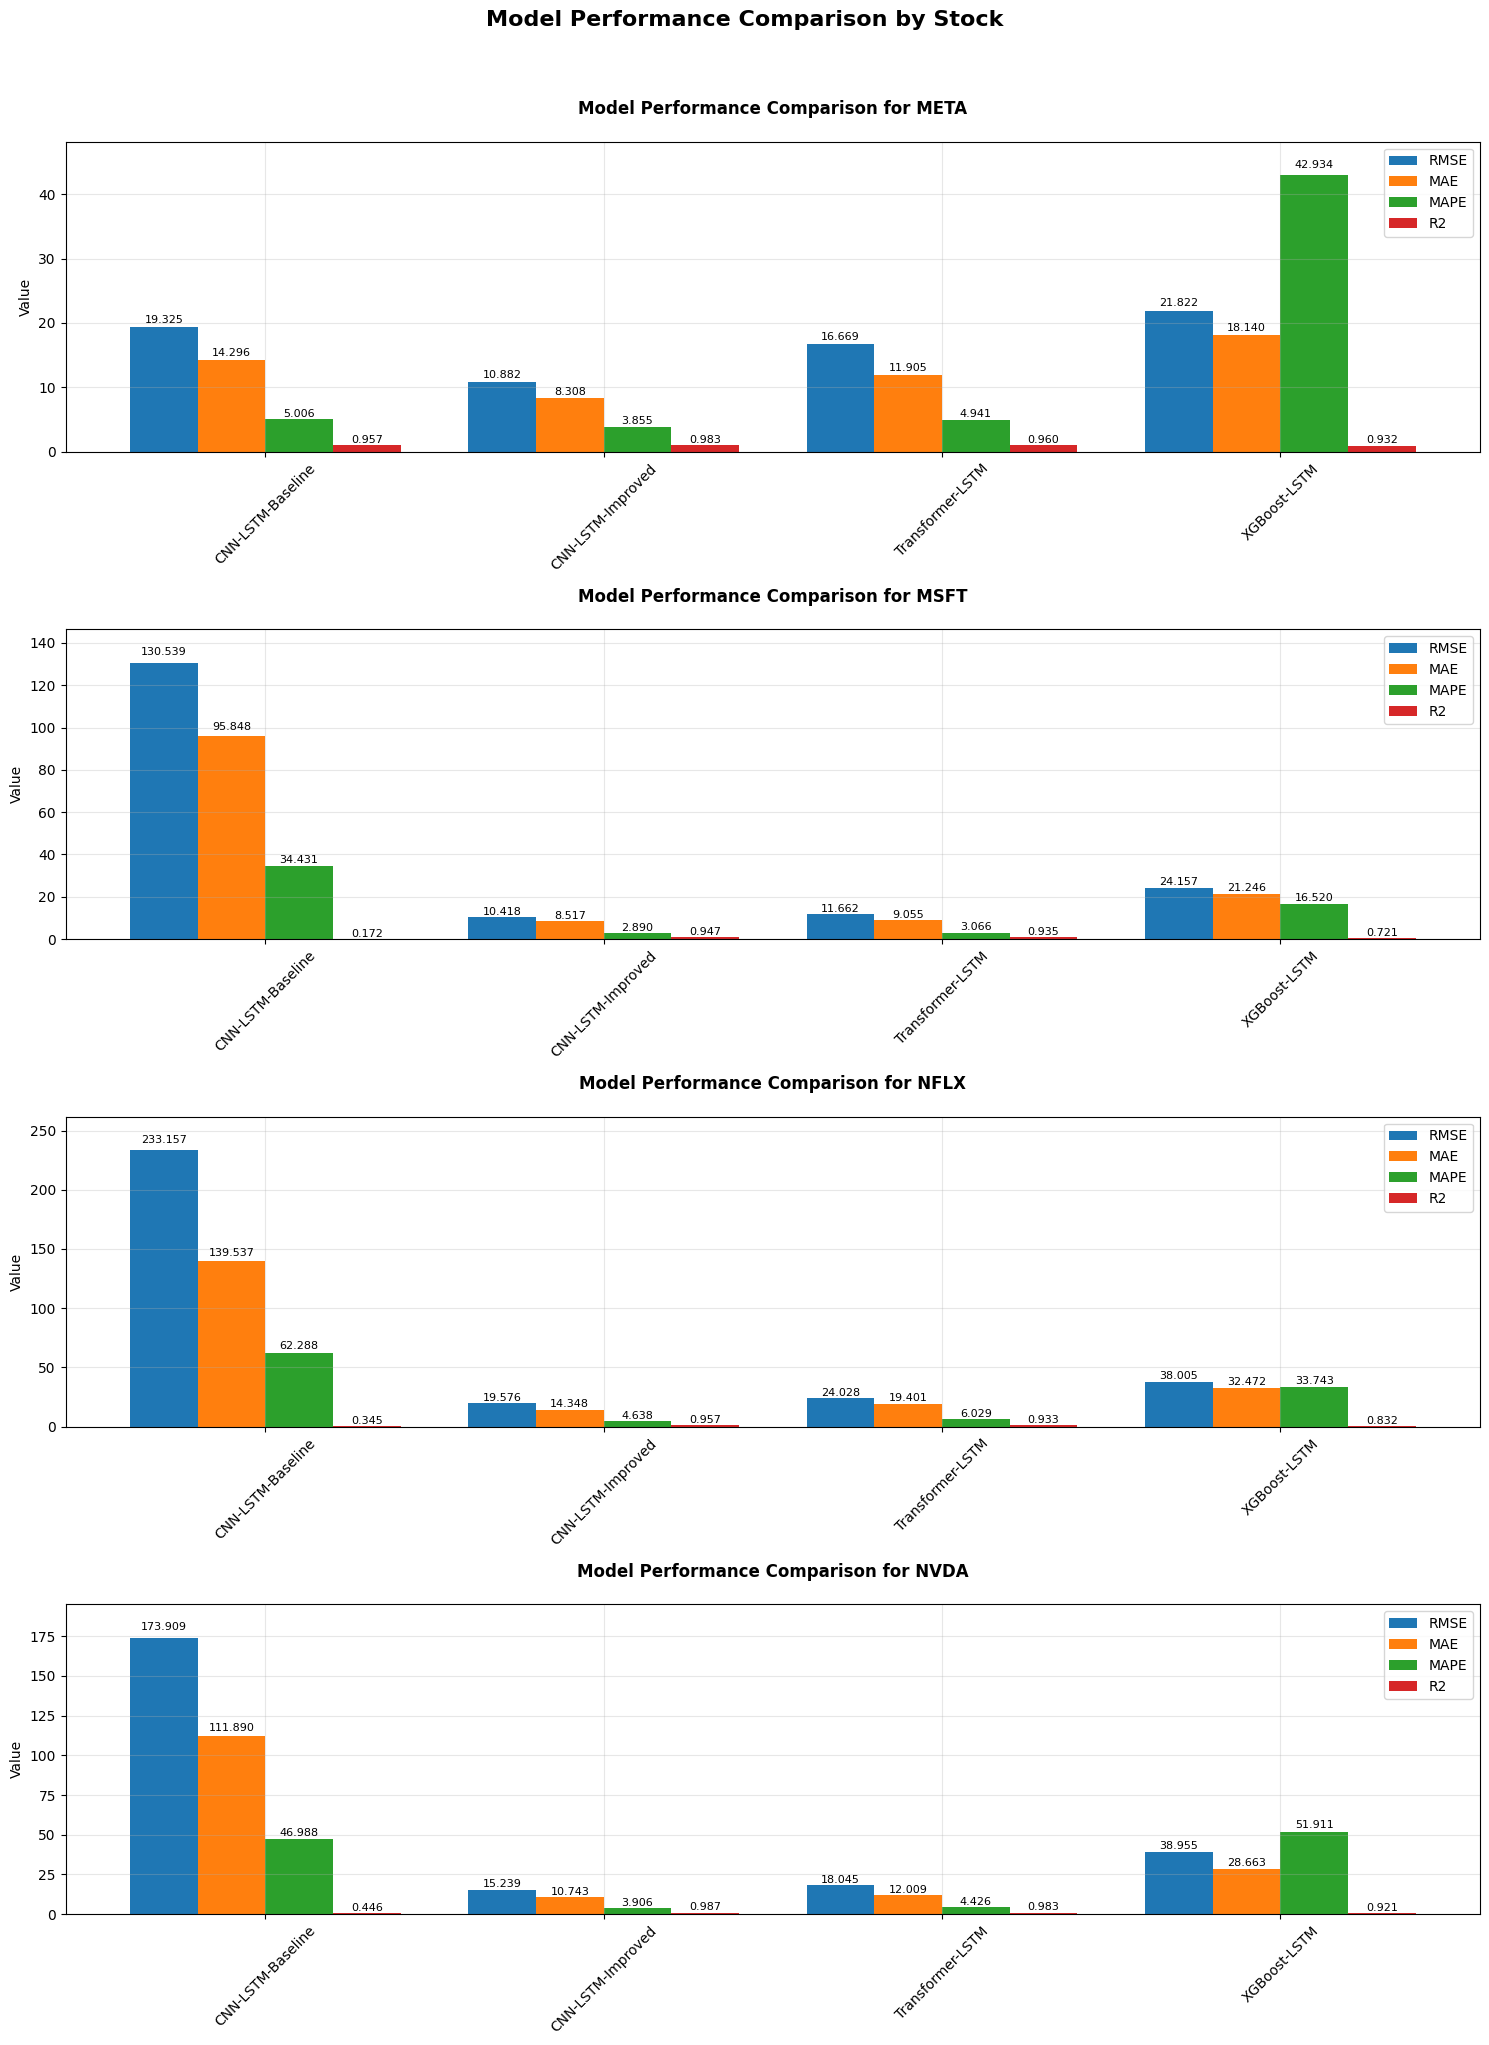

In [ ]:
# Read all metrics CSV files
all_files = glob.glob('metrics_*.csv')
all_metrics = pd.concat([pd.read_csv(f) for f in all_files])

def visualize_stock_performance(metrics_df):
    stocks = metrics_df['Stock'].unique()
    metrics = ['RMSE', 'MAE', 'MAPE', 'R2']
    
    fig, axes = plt.subplots(len(stocks), 1, figsize=(15, 20))  
    
    for idx, stock in enumerate(stocks):
        # Filter data for current stock
        stock_data = metrics_df[metrics_df['Stock'] == stock]
        
        # Grouped bar plot 
        x = np.arange(len(stock_data['Model']))
        width = 0.2  
        
        for i, metric in enumerate(metrics):
            ax = axes[idx]
            ax.bar(x + i*width, stock_data[metric], width, label=metric)
            
 
        ax.set_ylabel('Value')
        ax.set_title(f'Model Performance Comparison for {stock}', fontsize=12, fontweight='bold', pad=20)
        ax.set_xticks(x + width * 1.5)
        ax.set_xticklabels(stock_data['Model'], rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add value labels 
        max_value = 0
        for i, metric in enumerate(metrics):
            for j, value in enumerate(stock_data[metric]):
                y_offset = value * 0.02
                ax.text(j + i*width, value + y_offset, f'{value:.3f}', 
                       ha='center', va='bottom', fontsize=8)
                max_value = max(max_value, value + y_offset)
        ax.set_ylim(0, max_value * 1.1)
    
    plt.suptitle('Model Performance Comparison by Stock', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

visualize_stock_performance(all_metrics)